In [40]:
from triqs.gf import Gf, MeshImFreq, MeshReFreq, Omega, Flat, inverse

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']=100 

In [4]:
from triqs.plot.mpl_interface import oplot, plt

In [182]:
# Parameters
D     = 10.0
eps_d = 0.
U     = 10.0
mu    = U / 2.
beta  = 140.0
V     = 2.
ieta  = 1e-13j

# Define and initialize G0 in freq
iw_mesh = MeshImFreq(beta=beta, statistic='Fermion', n_iw=1000)
G0_iw = Gf(mesh=iw_mesh, target_shape=[1,1])
G0_iw << inverse(Omega - eps_d - V**2 * Flat(D) + ieta)

# Compute second-order self-energy
G0_tau = make_gf_from_fourier(G0_iw)
Sigma_tau = U**2 * G0_tau * G0_tau * G0_tau
Sigma_iw = U / 2. + make_gf_from_fourier(Sigma_tau)

# Dyson's equation
G_iw = G0_iw.copy()
G_iw << inverse(inverse(G0_iw) - Sigma_iw + mu)

Greens Function  with mesh Imaginary Freq Mesh with beta = 140, statistic = Fermion, n_iw = 1000, positive_only = false and target_shape (1, 1): 

In [183]:
# Get real axis function with Pade approximation
G_w = Gf(mesh=MeshReFreq(window = (-20.0,20.0), n_w=1000), target_shape=[1,1])
G_w.set_from_pade(G_iw, 100, 0.01)

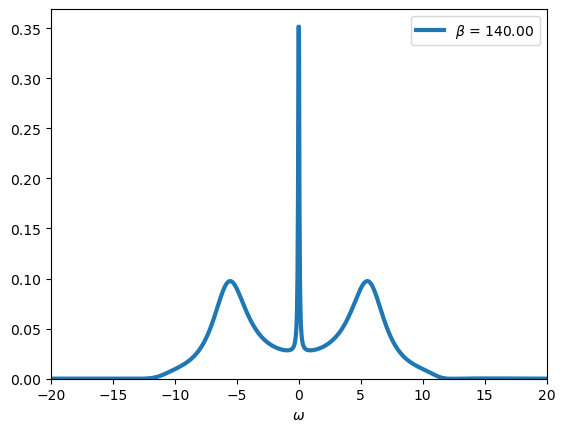

In [184]:
# plotting
oplot(-G_w.imag/pi, linewidth=3, label=rf"$\beta$ = {beta:.2f}")
plt.xlim(-20,20)
plt.ylim(0,)
plt.ylabel("")
plt.show()